In [1]:
import pandas as pd

In [15]:
teams = pd.read_csv("teams.csv")

In [16]:
teams.head()

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0


In [17]:
teams.columns

Index(['team', 'year', 'athletes', 'events', 'age', 'height', 'weight',
       'prev_medals', 'medals'],
      dtype='object')

In [19]:
teams = teams[["team", "year", "athletes", "age", "prev_medals", "medals"]]

In [20]:
teams.corr()["medals"]

year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [21]:
import seaborn as sns

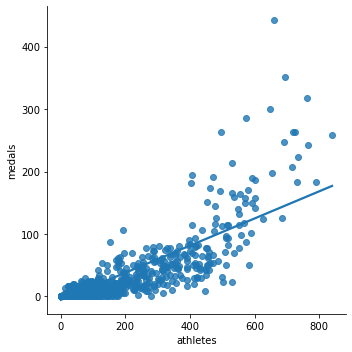

In [22]:
sns.lmplot(x='athletes', y='medals', data = teams, fit_reg=True, ci=None);

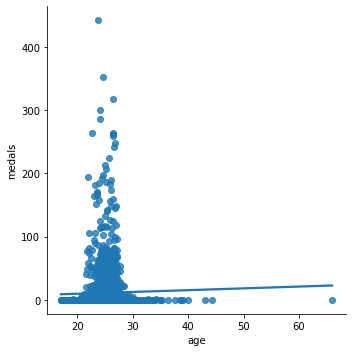

In [23]:
sns.lmplot(x='age', y='medals', data= teams, fit_reg=True, ci=None);

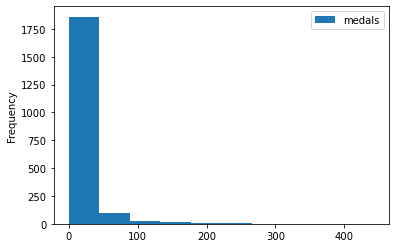

In [24]:
teams.plot.hist(y="medals");

In [25]:
teams[teams.isnull().any(axis=1)].head(20)

,team,year,athletes,age,prev_medals,medals


In [26]:
teams.shape

(2014, 6)

In [27]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         2014 non-null   object 
 1   year         2014 non-null   int64  
 2   athletes     2014 non-null   int64  
 3   age          2014 non-null   float64
 4   prev_medals  2014 non-null   float64
 5   medals       2014 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 94.5+ KB


### Split the data for traning machine learning model

In [28]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [29]:
train.shape

(1609, 6)

In [31]:
# about 80% of the data for train
2014*0.8

1611.2

In [32]:
test.shape

(405, 6)

### Machine Learning model

In [37]:
#%pip install -U scikit-learn

In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
reg = LinearRegression()

In [39]:
predictors = ["athletes", "prev_medals"]

In [40]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [41]:
predictions = reg.predict(test[predictors])

In [42]:
predictions.shape

(405,)

In [43]:
test["predictions"] = predictions

In [44]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [45]:
test["predictions"] = test["predictions"].round()

In [46]:
from sklearn.metrics import mean_absolute_error

In [47]:
error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [48]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [49]:
test["predictions"] = predictions

In [50]:
test[test["team"] == "USA"]

,team,year,athletes,age,prev_medals,medals,predictions
1931,USA,2012,689,26.7,317.0,248,285.210121
1932,USA,2016,719,26.4,248.0,264,235.568076


In [52]:
test[test["team"] == "GBR"]

,team,year,athletes,age,prev_medals,medals,predictions
673,GBR,2012,684,25.9,81.0,126,107.703986
674,GBR,2016,478,26.7,126.0,145,126.711153


In [55]:
errors = (test["medals"] - predictions).abs()

In [56]:
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio = error_by_team / medals_by_team

In [57]:
import numpy as np

In [59]:
error_ratio = error_ratio[np.isfinite(error_ratio)]

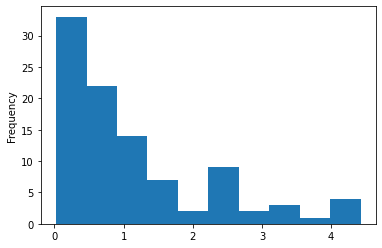

In [60]:
error_ratio.plot.hist();

In [61]:
error_ratio.sort_values()

team
FRA    0.024289
CAN    0.050844
NZL    0.071349
RUS    0.081841
ITA    0.119537
         ...   
PHI    3.563248
JOR    4.065175
BDI    4.136878
AUT    4.257950
NIG    4.423693
Name: medals, Length: 97, dtype: float64

## Next Step

* This model works reasonally well for countries have more medals and not good for countries with fewer medeals

* Need more features that represent true predictors 